# Machine Learning Project

  

### Data : https://www.kaggle.com/sneharshinde/ltfs-av-data

#### Team: Varun Muralidharan (VXM180016), Parthasarathy Sundar Karthikeyan (PXS180018) 


### Description

#### The Project is about classifying people who default on their loan payments. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/train.csv")

## Descriptive Analysis

In [5]:
#do not run, takes more than 15 mins

profile = pandas_profiling.ProfileReport(data, check_recoded = False)
display(profile)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
# Taking a sample of the data
datanew = data.sample(n=10000)

In [7]:
datanew.shape
datanew.info()

(10000, 41)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 49573 to 19841
Data columns (total 41 columns):
UniqueID                               10000 non-null int64
disbursed_amount                       10000 non-null int64
asset_cost                             10000 non-null int64
ltv                                    10000 non-null float64
branch_id                              10000 non-null int64
supplier_id                            10000 non-null int64
manufacturer_id                        10000 non-null int64
Current_pincode_ID                     10000 non-null int64
Date.of.Birth                          10000 non-null object
Employment.Type                        9691 non-null object
DisbursalDate                          10000 non-null object
State_ID                               10000 non-null int64
Employee_code_ID                       10000 non-null int64
MobileNo_Avl_Flag                      10000 non-null int64
Aadhar_flag                            1000

In [8]:
datanew.describe()

UniqueID  disbursed_amount  ...  NO.OF_INQUIRIES  loan_default
count   10000.000000      10000.000000  ...     10000.000000  10000.000000
mean   535412.146600      54175.697600  ...         0.197900      0.218300
std     68433.396796      12744.351641  ...         0.702556      0.413113
min    417432.000000      13664.000000  ...         0.000000      0.000000
25%    475491.250000      46849.000000  ...         0.000000      0.000000
50%    535013.000000      53659.000000  ...         0.000000      0.000000
75%    595031.500000      60213.000000  ...         0.000000      0.000000
max    658665.000000     190887.000000  ...        22.000000      1.000000

[8 rows x 35 columns]

In [9]:
# Checking  null value
datanew.isnull().sum().T

UniqueID                                 0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
supplier_id                              0
manufacturer_id                          0
Current_pincode_ID                       0
Date.of.Birth                            0
Employment.Type                        309
DisbursalDate                            0
State_ID                                 0
Employee_code_ID                         0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
PERFORM_CNS.SCORE.DESCRIPTION            0
PRI.NO.OF.ACCTS                          0
PRI.ACTIVE.ACCTS                         0
PRI.OVERDUE

In [10]:
datanew.T

49573  ...                        19841
UniqueID                                  437174  ...                       493472
disbursed_amount                           49423  ...                        41210
asset_cost                                 60598  ...                        57493
ltv                                           84  ...                        73.92
branch_id                                     18  ...                          251
supplier_id                                15062  ...                        20514
manufacturer_id                               45  ...                           45
Current_pincode_ID                          2705  ...                         6861
Date.of.Birth                           16-04-74  ...                     01-10-79
Employment.Type                         Salaried  ...                Self employed
DisbursalDate                           14-08-18  ...                     06-09-18
State_ID                                       4  ...                           13
Employee_code_ID                            1077  ...                          620
MobileNo_Avl_Flag                              1  ...                            1
Aadhar_flag                                    1  ...                            0
PAN_flag                                       0  ...                            0
VoterID_flag                                   0  ...                            1
Driving_flag                                   0  ...                            0
Passport_flag                                  0  ...                            0
PERFORM_CNS.SCORE                            419  ...                            0
PERFORM_CNS.SCORE.DESCRIPTION        K-High Risk  ...  No Bureau History Available
PRI.NO.OF.ACCTS                                2  ...                            0
PRI.ACTIVE.ACCTS                               1  ...                            0
PRI.OVERDUE.ACCTS                              1  ...                            0
PRI.CURRENT.BALANCE                       790045  ...                            0
PRI.SANCTIONED.AMOUNT                     875000  ...                            0
PRI.DISBURSED.AMOUNT                      875000  ...                            0
SEC.NO.OF.ACCTS                                0  ...                            0
SEC.ACTIVE.ACCTS                               0  ...                            0
SEC.OVERDUE.ACCTS                              0  ...                            0
SEC.CURRENT.BALANCE                            0  ...                            0
SEC.SANCTIONED.AMOUNT                          0  ...                            0
SEC.DISBURSED.AMOUNT                           0  ...                            0
PRIMARY.INSTAL.AMT                             0  ...                            0
SEC.INSTAL.AMT                                 0  ...                            0
NEW.ACCTS.IN.LAST.SIX.MONTHS                   0  ...                            0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS            1  ...                            0
AVERAGE.ACCT.AGE                       1yrs 4mon  ...                    0yrs 0mon
CREDIT.HISTORY.LENGTH                  1yrs 9mon  ...                    0yrs 0mon
NO.OF_INQUIRIES                                0  ...                            0
loan_default                                   1  ...                            1

[41 rows x 10000 columns]

In [11]:
sns.pairplot(datanew)

## **Preprocessing**

Removing Ids and redundant or correlated columns obtained from the pandas profiling


In [0]:
datanew = datanew.drop(columns = ['UniqueID','branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID', 
                                  'PRI.DISBURSED.AMOUNT', 'MobileNo_Avl_Flag', 'DisbursalDate', 'SEC.SANCTIONED.AMOUNT', 'Date.of.Birth'])

In [13]:
datanew.info()
datanew.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 49573 to 19841
Data columns (total 29 columns):
disbursed_amount                       10000 non-null int64
asset_cost                             10000 non-null int64
ltv                                    10000 non-null float64
Employment.Type                        9691 non-null object
Aadhar_flag                            10000 non-null int64
PAN_flag                               10000 non-null int64
VoterID_flag                           10000 non-null int64
Driving_flag                           10000 non-null int64
Passport_flag                          10000 non-null int64
PERFORM_CNS.SCORE                      10000 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION          10000 non-null object
PRI.NO.OF.ACCTS                        10000 non-null int64
PRI.ACTIVE.ACCTS                       10000 non-null int64
PRI.OVERDUE.ACCTS                      10000 non-null int64
PRI.CURRENT.BALANCE                    10000

disbursed_amount                         0
asset_cost                               0
ltv                                      0
Employment.Type                        309
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
PERFORM_CNS.SCORE.DESCRIPTION            0
PRI.NO.OF.ACCTS                          0
PRI.ACTIVE.ACCTS                         0
PRI.OVERDUE.ACCTS                        0
PRI.CURRENT.BALANCE                      0
PRI.SANCTIONED.AMOUNT                    0
SEC.NO.OF.ACCTS                          0
SEC.ACTIVE.ACCTS                         0
SEC.OVERDUE.ACCTS                        0
SEC.CURRENT.BALANCE                      0
SEC.DISBURSED.AMOUNT                     0
PRIMARY.INSTAL.AMT                       0
SEC.INSTAL.AMT                           0
NEW.ACCTS.I

In [14]:
pd.unique(datanew['Employment.Type'])

array(['Salaried', 'Self employed', nan], dtype=object)

In [15]:
# Replacing missing values as others
datanew['Employment.Type']=datanew['Employment.Type'].replace(to_replace = np.nan, value ="others")
pd.unique(datanew['Employment.Type'])

array(['Salaried', 'Self employed', 'others'], dtype=object)

In [0]:
# redundant so removing
datanew = datanew.drop(columns = ['PERFORM_CNS.SCORE.DESCRIPTION'])

In [19]:
# For Average account Age getting months

datanew2 = pd.DataFrame(datanew['AVERAGE.ACCT.AGE'].str.split(' ',1).tolist(),columns = ['AVERAGE.ACCT.AGE.YRS','AVERAGE.ACCT.AGE.MONTHS'])
datanew2['AVERAGE.ACCT.AGE.YRS'].head()
datanew2['AVERAGE.ACCT.AGE.MONTHS'].head()

0    1yrs
1    0yrs
2    2yrs
3    0yrs
4    0yrs
Name: AVERAGE.ACCT.AGE.YRS, dtype: object

0    4mon
1    2mon
2    3mon
3    0mon
4    0mon
Name: AVERAGE.ACCT.AGE.MONTHS, dtype: object

In [20]:
datanew2=pd.DataFrame(datanew2)
datanew2.head()

AVERAGE.ACCT.AGE.YRS AVERAGE.ACCT.AGE.MONTHS
0                 1yrs                    4mon
1                 0yrs                    2mon
2                 2yrs                    3mon
3                 0yrs                    0mon
4                 0yrs                    0mon

In [21]:
datanew2['AVERAGE.ACCT.AGE.YRS'] = datanew2['AVERAGE.ACCT.AGE.YRS'].map(lambda x: x.rstrip('yrs'))
datanew2['AVERAGE.ACCT.AGE.YRS'].head()
datanew2['AVERAGE.ACCT.AGE.MONTHS'] = datanew2['AVERAGE.ACCT.AGE.MONTHS'].map(lambda x: x.rstrip('mon'))
datanew2['AVERAGE.ACCT.AGE.MONTHS'].head()
datanew2= datanew2.astype('int64')


0    1
1    0
2    2
3    0
4    0
Name: AVERAGE.ACCT.AGE.YRS, dtype: object

0    4
1    2
2    3
3    0
4    0
Name: AVERAGE.ACCT.AGE.MONTHS, dtype: object

In [22]:
datanew2.isna().sum()
datanew2['AVERAGE.ACCT.AGE.FINAL']=datanew2['AVERAGE.ACCT.AGE.YRS']*12 + datanew2['AVERAGE.ACCT.AGE.MONTHS']
datanew2.head(10)

AVERAGE.ACCT.AGE.YRS       0
AVERAGE.ACCT.AGE.MONTHS    0
dtype: int64

AVERAGE.ACCT.AGE.YRS  AVERAGE.ACCT.AGE.MONTHS  AVERAGE.ACCT.AGE.FINAL
0                     1                        4                      16
1                     0                        2                       2
2                     2                        3                      27
3                     0                        0                       0
4                     0                        0                       0
5                     1                        2                      14
6                     0                        0                       0
7                     0                        0                       0
8                     0                       11                      11
9                     0                        0                       0

In [0]:
datanew2=pd.DataFrame(datanew2)

In [24]:
datanew3 = pd.concat([datanew.reset_index(drop=True),datanew2['AVERAGE.ACCT.AGE.FINAL']], axis=1)
datanew3.head(3)

disbursed_amount  asset_cost  ...  loan_default AVERAGE.ACCT.AGE.FINAL
0             49423       60598  ...             1                     16
1             52553       76560  ...             0                      2
2             46349       65649  ...             1                     27

[3 rows x 29 columns]

In [0]:
datanew3 = datanew3.drop(columns = ['AVERAGE.ACCT.AGE'])


In [0]:
datanew2.drop(datanew2.index, inplace=True)

In [27]:
datanew3.head()

disbursed_amount  asset_cost  ...  loan_default AVERAGE.ACCT.AGE.FINAL
0             49423       60598  ...             1                     16
1             52553       76560  ...             0                      2
2             46349       65649  ...             1                     27
3             52703       63923  ...             0                      0
4             68469       88863  ...             0                      0

[5 rows x 28 columns]

In [28]:
# for CREDIT.HISTORY.LENGTH getting months
datanew2 = pd.DataFrame(datanew['CREDIT.HISTORY.LENGTH'].str.split(' ',1).tolist(),columns = ['CREDIT.HISTORY.LENGTH.YRS','CREDIT.HISTORY.LENGTH.MONTHS'])
datanew2['CREDIT.HISTORY.LENGTH.YRS'].head()
datanew2['CREDIT.HISTORY.LENGTH.MONTHS'].head()
datanew2=pd.DataFrame(datanew2)

0    1yrs
1    0yrs
2    2yrs
3    0yrs
4    0yrs
Name: CREDIT.HISTORY.LENGTH.YRS, dtype: object

0    9mon
1    2mon
2    3mon
3    0mon
4    0mon
Name: CREDIT.HISTORY.LENGTH.MONTHS, dtype: object

In [29]:
datanew2['CREDIT.HISTORY.LENGTH.YRS'] = datanew2['CREDIT.HISTORY.LENGTH.YRS'].map(lambda x: x.rstrip('yrs'))
datanew2['CREDIT.HISTORY.LENGTH.YRS'].head()
datanew2['CREDIT.HISTORY.LENGTH.MONTHS'] = datanew2['CREDIT.HISTORY.LENGTH.MONTHS'].map(lambda x: x.rstrip('mon'))
datanew2['CREDIT.HISTORY.LENGTH.MONTHS'].head()
datanew2= datanew2.astype('int64')


0    1
1    0
2    2
3    0
4    0
Name: CREDIT.HISTORY.LENGTH.YRS, dtype: object

0    9
1    2
2    3
3    0
4    0
Name: CREDIT.HISTORY.LENGTH.MONTHS, dtype: object

In [30]:
datanew2['CREDIT.HISTORY.LENGTH.FINAL']=datanew2['CREDIT.HISTORY.LENGTH.YRS']*12 + datanew2['CREDIT.HISTORY.LENGTH.MONTHS']
datanew2.head(10)
datanew2=pd.DataFrame(datanew2)

CREDIT.HISTORY.LENGTH.YRS  ...  CREDIT.HISTORY.LENGTH.FINAL
0                          1  ...                           21
1                          0  ...                            2
2                          2  ...                           27
3                          0  ...                            0
4                          0  ...                            0
5                          2  ...                           28
6                          0  ...                            0
7                          0  ...                            0
8                          1  ...                           12
9                          0  ...                            0

[10 rows x 3 columns]

In [31]:
datanew4 = pd.concat([datanew3.reset_index(drop=True),datanew2['CREDIT.HISTORY.LENGTH.FINAL']], axis=1)
datanew4.head(3)

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27

[3 rows x 29 columns]

In [32]:
datanew4 = datanew4.drop(columns = ['CREDIT.HISTORY.LENGTH'])
datanew4.head()

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27
3             52703  ...                            0
4             68469  ...                            0

[5 rows x 28 columns]

In [0]:
datanew2.drop(datanew2.index, inplace=True)
datanew3.drop(datanew3.index, inplace=True)

In [34]:
datanew.drop(datanew.index, inplace=True)
datanew4.head()

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27
3             52703  ...                            0
4             68469  ...                            0

[5 rows x 28 columns]

In [35]:
datanew=datanew4
datanew.head()
#datanew4.drop(datanew4.index, inplace=True)

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27
3             52703  ...                            0
4             68469  ...                            0

[5 rows x 28 columns]

In [36]:
datanew.head()

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27
3             52703  ...                            0
4             68469  ...                            0

[5 rows x 28 columns]

In [37]:
#datanew['ltv'] = datanew['ltv'].astype(int)
#datanew['AVERAGE.ACCT.AGE'].head()
datanew.describe()

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
count      10000.000000  ...                  10000.00000
mean       54175.697600  ...                     15.92480
std        12744.351641  ...                     28.23759
min        13664.000000  ...                      0.00000
25%        46849.000000  ...                      0.00000
50%        53659.000000  ...                      0.00000
75%        60213.000000  ...                     23.00000
max       190887.000000  ...                    343.00000

[8 rows x 27 columns]

In [0]:
m=['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']
for i in m:
  datanew[i] = datanew[i].astype('bool')

In [39]:
# Type Casting columns
datanew['Aadhar_flag']=datanew['Aadhar_flag'].astype('bool')
datanew['PAN_flag']=datanew['PAN_flag'].astype('bool')
datanew['VoterID_flag']=datanew['VoterID_flag'].astype('bool')
datanew['Driving_flag']=datanew['Driving_flag'].astype('bool')
datanew['Passport_flag']=datanew['Passport_flag'].astype('bool')
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
disbursed_amount                       10000 non-null int64
asset_cost                             10000 non-null int64
ltv                                    10000 non-null float64
Employment.Type                        10000 non-null object
Aadhar_flag                            10000 non-null bool
PAN_flag                               10000 non-null bool
VoterID_flag                           10000 non-null bool
Driving_flag                           10000 non-null bool
Passport_flag                          10000 non-null bool
PERFORM_CNS.SCORE                      10000 non-null int64
PRI.NO.OF.ACCTS                        10000 non-null int64
PRI.ACTIVE.ACCTS                       10000 non-null int64
PRI.OVERDUE.ACCTS                      10000 non-null int64
PRI.CURRENT.BALANCE                    10000 non-null int64
PRI.SANCTIONED.AMOUNT                  10000 non-null 

In [40]:
databackup=datanew
databackup.head()

disbursed_amount  ...  CREDIT.HISTORY.LENGTH.FINAL
0             49423  ...                           21
1             52553  ...                            2
2             46349  ...                           27
3             52703  ...                            0
4             68469  ...                            0

[5 rows x 28 columns]

In [41]:
# One hot encoding of Employment.Type
df2Dummies2 = pd.get_dummies(datanew['Employment.Type'], prefix = 'Employment.Type')
v=df2Dummies2.drop(df2Dummies2.columns[2], axis=1)
datanew = pd.concat([datanew, v], axis = 1)
datanew=datanew.drop(['Employment.Type'],axis=1)
datanew.head()

disbursed_amount  ...  Employment.Type_Self employed
0             49423  ...                              0
1             52553  ...                              0
2             46349  ...                              1
3             52703  ...                              0
4             68469  ...                              0

[5 rows x 29 columns]

In [42]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
disbursed_amount                       10000 non-null int64
asset_cost                             10000 non-null int64
ltv                                    10000 non-null float64
Aadhar_flag                            10000 non-null bool
PAN_flag                               10000 non-null bool
VoterID_flag                           10000 non-null bool
Driving_flag                           10000 non-null bool
Passport_flag                          10000 non-null bool
PERFORM_CNS.SCORE                      10000 non-null int64
PRI.NO.OF.ACCTS                        10000 non-null int64
PRI.ACTIVE.ACCTS                       10000 non-null int64
PRI.OVERDUE.ACCTS                      10000 non-null int64
PRI.CURRENT.BALANCE                    10000 non-null int64
PRI.SANCTIONED.AMOUNT                  10000 non-null int64
SEC.NO.OF.ACCTS                        10000 non-null i

In [0]:
X = datanew.loc[:, datanew.columns != 'loan_default']
y = datanew["loan_default"]
y = y.astype('category')


In [0]:
# Train test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
# Scaling Variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler


mm = MinMaxScaler()
ss = StandardScaler()

ss_train = StandardScaler()
ss_test = StandardScaler()

X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)


In [0]:
final_train_score=[]
description=[]
final_test_score=[]

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid1 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                    param_grid1, cv = 7, return_train_score= True, iid = False, scoring = 'recall_macro')

grid1.fit(X_train_scale, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_macro', verbose=0)

In [48]:
print(grid1.best_params_)
print(grid1.best_score_)
final_train_score.append(grid1.best_score_)
print(grid1.scorer_)
description.append("logistic regression C : 1")

{'C': 1}
0.5008004044173245
make_scorer(recall_score, pos_label=None, average=macro)


In [49]:
grid1.score(X_test_scale, y_test)
final_test_score.append(grid1.score(X_test_scale, y_test))

0.5001733590895409

In [50]:
c_range = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_scale, y_train)
    log_l2.fit(X_train_scale, y_train)
    train_score_l1.append(log_l1.score(X_train_scale, y_train))
    train_score_l2.append(log_l2.score(X_train_scale, y_train))
    test_score_l1.append(log_l1.score(X_test_scale, y_test))
    test_score_l2.append(log_l2.score(X_test_scale, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

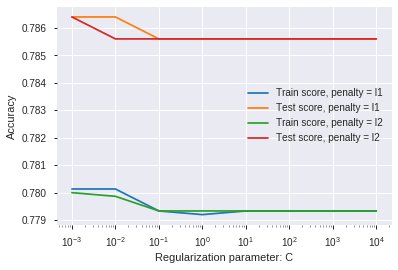

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#### From this we can see that L1 penalty at 0.10 Regularization parameter C gives use the best fit

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier


param_grid2 = {'max_depth': [3, 5, 10, 12, 15, 50, 100]}
grid2 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid2, cv = 5, return_train_score= True, iid = False)
grid2.fit(X_train_scale, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 12, 15, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [53]:
print(grid2.best_score_)
print(grid2.best_params_)

0.7801333831703925
{'max_depth': 3}


In [54]:
grid2.score(X_test_scale, y_test)

0.7864

In [0]:
description.append("Decision Tree max depth 3")
final_train_score.append(grid2.best_score_)
final_test_score.append(grid2.score(X_test_scale, y_test))

### K Nearest Neighbors

In [0]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_param3 = {
    
    'n_neighbors': [1, 5, 10, 40, 50, 60, 100, 200, 500],
    'weights': ['uniform', 'distance']
    
}


gs3 = GridSearchCV(
      KNeighborsClassifier(),
      grid_param3,
      verbose = 1,
      cv = 2)




In [57]:
gs3_results = gs3.fit(X_train_scale, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   23.8s finished


In [58]:
print(gs3.best_params_)
print(gs3.best_score_)
print(gs3.scorer_)

{'n_neighbors': 500, 'weights': 'distance'}
0.7804
<function _passthrough_scorer at 0x7f8265d72c80>


In [59]:
gs3.score(X_test_scale, y_test)

0.7872

In [0]:
description.append("KNN n= 40, weights = uniform")
final_train_score.append(gs3.best_score_)
final_test_score.append(gs3.score(X_test_scale, y_test))

In [61]:
import sklearn

k_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 40, 45, 50, 60, 100, 200]

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = sklearn.model_selection.cross_val_score(knn, X_train_scale, y_train, cv=2, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6722671411389967, 0.7569338493819626, 0.7157326731187679, 0.7593334228859323, 0.7426667905896385, 0.7662671122678835, 0.7538661513860374, 0.7693333169303692, 0.7600000540444483, 0.7708000903680063, 0.7802667221523003, 0.7801334243650435, 0.7802667221523003, 0.7800000554666706, 0.7801333532539274, 0.7801333532539274]


Text(0.5, 0, 'Value of K for KNN')

Text(0, 0.5, 'Cross-Validated Accuracy')

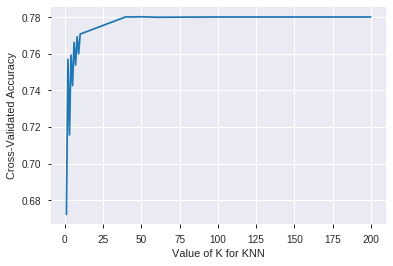

In [62]:
%matplotlib inline


plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### SVC

In [63]:
param_grid4 = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid4))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search4 = GridSearchCV(SVC(), param_grid4, cv=2, return_train_score=True)

In [65]:
grid_search4.fit(X_train_scale, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [66]:
print("Best parameters: {}".format(grid_search4.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search4.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [67]:
grid_search4.score(X_test_scale, y_test)

0.7864

In [0]:
description.append("SVC C: 0.001, gamma: 0.001")
final_train_score.append(grid_search4.best_score_)
final_test_score.append(grid_search4.score(X_test_scale, y_test))

In [0]:
results = pd.DataFrame(grid_search4.cv_results_)

In [70]:
display(results.head())

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.391682      0.010663  ...          0.780133         0.000075
1       0.392525      0.009204  ...          0.780133         0.000075
2       0.392508      0.009288  ...          0.780133         0.000075
3       0.389475      0.003540  ...          0.780133         0.000075
4       0.402089      0.002193  ...          0.780133         0.000075

[5 rows x 16 columns]

In [0]:
#%matplotlib notebook

#import mglearn
#scores = np.array(results.mean_test_score).reshape(6, 6)

In [0]:
#%matplotlib inline



#mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid4['gamma'], ylabel='C', yticklabels=param_grid4['C'], cmap="viridis")

#### The heatmap shows us the accuracy of a number of different gamma and C values. There exist minute variance in the accuracy at the 0.0001 level, which is why the map shows 0.78 overall. 

### SVM Linear Kernel

In [73]:
from sklearn.svm import SVC


param_grid5 = {'C': [0.01, 0.1, 1, 10]}

print("Parameter grid:\n{}".format(param_grid5))

Parameter grid:
{'C': [0.01, 0.1, 1, 10]}


In [0]:
grid_search5 = GridSearchCV(SVC(kernel = 'linear'), param_grid5, cv=2, return_train_score=True)

In [75]:
grid_search5.fit(X_train_scale, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [76]:
print("Best parameters: {}".format(grid_search5.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search5.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.78


In [77]:
grid_search5.score(X_test_scale, y_test)

0.7864

In [0]:
description.append("SVC Linear C: 0.01")
final_train_score.append(grid_search5.best_score_)
final_test_score.append(grid_search5.score(X_test_scale, y_test))

### SVM RBF Kernel

In [79]:
param_grid6 = {'C': [0.001, 0.01, 1, 10, 100],
              'gamma': [0.001, 0.01, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid6))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 100], 'gamma': [0.001, 0.01, 1, 10, 100]}


In [0]:
grid_search6 = GridSearchCV(SVC(kernel = 'rbf'), param_grid6, cv=2, return_train_score=True)

In [81]:
grid_search6.fit(X_train_scale, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [82]:
print("Best parameters: {}".format(grid_search6.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search6.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [83]:
grid_search6.score(X_test_scale, y_test)

0.7864

In [0]:
description.append("SVC RBF C: 0.01 gamma : 0.001")
final_train_score.append(grid_search6.best_score_)
final_test_score.append(grid_search6.score(X_test_scale, y_test))

### SVM Polynomial Kernel

In [85]:

param_grid7 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid7))




Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [0]:
gs7 = GridSearchCV(SVC(kernel='poly', degree=2), param_grid7, cv=2, return_train_score=True)

In [87]:
gs7.fit(X_train_scale, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [88]:
print("Best parameters: {}".format(gs7.best_params_))
print("Best cross-validation score: {:.2f}".format(gs7.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.78


In [89]:
gs7.score(X_test_scale, y_test)

0.786

In [0]:
description.append("SVC Poly C: 0.001")
final_train_score.append(gs7.best_score_)
final_test_score.append(gs7.score(X_test_scale, y_test))

#### Overall, from classifying on various models, we find that the KNN Classifier with 50 nearest neighbors gives us the best accuracy of 78.26%

## **Project Part 2 Starts**

In [0]:
# Hard Voting Classifier

**Hard Voting Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [93]:
log_clf = LogisticRegression()
log_clf.fit(X_train_scale, y_train)
knn_clf = KNeighborsClassifier(45)
knn_clf.fit(X_train_scale, y_train)
svm_clf = SVC(C= 0.001, gamma= 0.001, probability = True)
svm_clf.fit(X_train_scale, y_train)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train_scale, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train_scale, y_train)
    y_pred = clf.predict(X_test_scale)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.7856


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

KNeighborsClassifier 0.7864


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.7864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

VotingClassifier 0.7864


In [0]:
# Soft Vote Classifier

**Soft Vote Classifier**

In [95]:
log_clf = LogisticRegression()
log_clf.fit(X_train_scale, y_train)
knn_clf = KNeighborsClassifier(45)
knn_clf.fit(X_train_scale, y_train)
svm_clf = SVC(C= 0.001, gamma= 0.001, probability = True)
svm_clf.fit(X_train_scale, y_train)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train_scale, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train_scale, y_train)
    y_pred = clf.predict(X_test_scale)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression 0.7856


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

KNeighborsClassifier 0.7864


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC 0.7864


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

VotingClassifier 0.7864


In [96]:
X_train_scale

array([[-0.8698426 , -0.68884051, -0.43642112, ..., -0.55850567,
         1.19136679, -1.11964538],
       [ 2.16338828,  4.41205863, -1.90206979, ..., -0.55850567,
        -0.83937206,  0.89313994],
       [-0.47572994,  0.00475149, -0.89880351, ...,  1.57429856,
        -0.83937206,  0.89313994],
       ...,
       [ 0.29805107, -0.46466026,  1.16552684, ..., -0.31375765,
        -0.83937206,  0.89313994],
       [-0.85733972, -0.9202473 ,  0.33134069, ..., -0.55850567,
         1.19136679, -1.11964538],
       [-1.4363553 , -0.17156593, -1.91328429, ...,  0.21070241,
        -0.83937206,  0.89313994]])

In [0]:
# Bagging with Decision Trees


In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train_scale, y_train)
y_pred = bag_clf.predict(X_test_scale)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [98]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7864


In [99]:
bag_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_scale, y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

Train score: 0.78
Test score: 0.79


In [0]:
# Bagging Classifier with SVC

In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svm_clf = SVC(C= 0.001, gamma= 0.001, probability = True)

bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train_scale, y_train)
y_pred = bag_clf.predict(X_test_scale)

BaggingClassifier(base_estimator=SVC(C=0.001, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.001, kernel='rbf',
                                     max_iter=-1, probability=True,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=True, random_state=0, verbose=0, warm_start=False)

In [102]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7864


In [103]:
bag_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_scale, y_test)))

BaggingClassifier(base_estimator=SVC(C=0.001, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.001, kernel='rbf',
                                     max_iter=-1, probability=True,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=True, random_state=0, verbose=0, warm_start=False)

Train score: 0.78
Test score: 0.79


In [0]:
# Pasting with Decision Tree

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0, oob_score=False)

bag_clf.fit(X_train_scale, y_train)
y_pred = bag_clf.predict(X_test_scale)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [106]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7864


In [107]:
bag_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_scale, y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

Train score: 0.78
Test score: 0.79


In [0]:
# Pasting with SVC

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svm_clf = SVC(C= 0.001, gamma= 0.001, probability = True)

bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0, oob_score=False)

bag_clf.fit(X_train_scale, y_train)
y_pred = bag_clf.predict(X_test_scale)

BaggingClassifier(base_estimator=SVC(C=0.001, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.001, kernel='rbf',
                                     max_iter=-1, probability=True,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7864


In [111]:
bag_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_scale, y_test)))

BaggingClassifier(base_estimator=SVC(C=0.001, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.001, kernel='rbf',
                                     max_iter=-1, probability=True,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

Train score: 0.78
Test score: 0.79


In [0]:
# testing

In [0]:
X_train_scale2= pd.DataFrame(X_train_scale)
X_test_scale2 = pd.DataFrame(X_test_scale)
y_train2=pd.DataFrame(y_train)
y_test2=pd.DataFrame(y_test)




## **Ada Boosting for Decision tree Classifier**


In [114]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train_scale, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [115]:
y_pred=ada_clf.predict(X_test_scale)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7848


In [116]:
ada_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test_scale, y_test)))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

Train score: 0.78
Test score: 0.78


## **Ada Boosting with SGD Classifier**

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier


ada_clf = AdaBoostClassifier(SGDClassifier(loss='hinge'), n_estimators=200, algorithm="SAMME", learning_rate=0.1, random_state=0)
ada_clf.fit(X_train_scale, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='hinge', max_iter=1000,
                                                n_iter_no_change=5, n_jobs=None,
                                                penalty='l2', power_t=0.5,
                                                random_state=None, shuffle=True,
                                                tol=0.001,
                                                validation_fraction=0.1,
                           

In [118]:
y_pred=ada_clf.predict(X_test_scale)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7864


In [119]:
ada_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test_scale, y_test)))

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='hinge', max_iter=1000,
                                                n_iter_no_change=5, n_jobs=None,
                                                penalty='l2', power_t=0.5,
                                                random_state=None, shuffle=True,
                                                tol=0.001,
                                                validation_fraction=0.1,
                           

Train score: 0.78
Test score: 0.79


## **Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
gbct_clf=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=0)
gbct_clf.fit(X_train_scale, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
y_pred=gbct_clf.predict(X_test_scale)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7816


In [123]:
gbct_clf.fit(X_train_scale, y_train)
print('Train score: {:.2f}'.format(gbct_clf.score(X_train_scale, y_train)))
print('Test score: {:.2f}'.format(gbct_clf.score(X_test_scale, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Train score: 0.80
Test score: 0.78


### **PCA**

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_scale)
X_test_reduced = pca.transform(X_test_scale)

In [125]:
pca.n_components_

18

In [126]:
X_train_reduced[1]

array([-1.61832756e+00,  2.73401274e-01,  1.62919654e+00,  1.49617212e+00,
        4.10459009e+00, -5.11565368e-01,  4.48604814e-01,  1.82461300e+00,
       -1.66122036e+00,  7.27876989e-01, -3.91200186e-01,  1.43683954e-01,
       -7.73648455e-03, -1.99209776e-01, -9.98861734e-02,  1.86806222e-01,
       -1.64809035e-01, -1.80137709e-03])

In [0]:
descriptionPCA=[]
final_train_score_PCA=[]
final_test_score_PCA=[]

In [0]:
# Logistic PCA

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


pcaparam_grid1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

pcagrid1 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                    pcaparam_grid1, cv = 7, return_train_score= True, iid = False, scoring = 'recall_macro')

pcagrid1.fit(X_train_reduced, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_macro', verbose=0)

In [130]:
print(pcagrid1.best_params_)
print(pcagrid1.best_score_)
print(pcagrid1.scorer_)
pcagrid1.score(X_test_reduced, y_test)

{'C': 1}
0.5012288967214219
make_scorer(recall_score, pos_label=None, average=macro)


0.5004276825890323

In [0]:
descriptionPCA.append("Logistic C: 0.1")
final_train_score_PCA.append(pcagrid1.best_score_)
final_test_score_PCA.append(pcagrid1.score(X_test_reduced, y_test))

In [0]:
# L1 and L2 regression

In [133]:
c_range = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
pcatrain_score_l1 = []
pcatrain_score_l2 = []
pcatest_score_l1 = []
pcatest_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    pcatrain_score_l1.append(log_l1.score(X_train_reduced, y_train))
    pcatrain_score_l2.append(log_l2.score(X_train_reduced, y_train))
    pcatest_score_l1.append(log_l1.score(X_test_reduced, y_test))
    pcatest_score_l2.append(log_l2.score(X_test_reduced, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

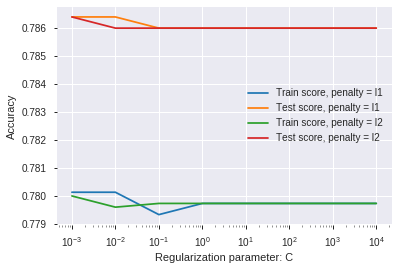

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, pcatrain_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, pcatest_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, pcatrain_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, pcatest_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [0]:
# Decision Tree PCA

In [136]:
from sklearn.tree import DecisionTreeClassifier


pcaparam_grid2 = {'max_depth': [3, 5, 10, 12, 15, 50, 100]}
pcagrid2 = GridSearchCV(DecisionTreeClassifier(random_state = 0), pcaparam_grid2, cv = 5, return_train_score= True, iid = False)
pcagrid2.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 12, 15, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [137]:
print(pcagrid2.best_score_)
print(pcagrid2.best_params_)

0.7786669829927332
{'max_depth': 3}


In [138]:
pcagrid2.score(X_test_reduced, y_test)

0.7848

In [0]:
descriptionPCA.append("Decision Tree max_depth : 3")
final_train_score_PCA.append(pcagrid2.best_score_)
final_test_score_PCA.append(pcagrid2.score(X_test_reduced, y_test))

In [0]:
# KNN PCA

In [0]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pcagrid_param3 = {
    
    'n_neighbors': [1, 5, 10, 40, 50, 60, 100, 200, 500],
    'weights': ['uniform', 'distance']
    
}


pcags3 = GridSearchCV(
      KNeighborsClassifier(),
      pcagrid_param3,
      verbose = 1,
      cv = 2)




In [142]:
pcags3_results = pcags3.fit(X_train_reduced, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.0s finished


In [143]:
print(pcags3.best_params_)
print(pcags3.best_score_)
print(pcags3.scorer_)

{'n_neighbors': 40, 'weights': 'uniform'}
0.7801333333333333
<function _passthrough_scorer at 0x7f8265d72c80>


In [144]:
pcags3.score(X_test_reduced, y_test)

0.786

In [0]:
descriptionPCA.append("KNN n : 200, weights : distance")
final_train_score_PCA.append(pcags3.best_score_)
final_test_score_PCA.append(pcags3.score(X_test_reduced, y_test))

In [146]:
import sklearn

k_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 40, 45, 50, 60, 100, 200]

# list of scores from k_range
pcak_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = sklearn.model_selection.cross_val_score(knn, X_train_reduced, y_train, cv=2, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    pcak_scores.append(scores.mean())
print(pcak_scores)

[0.6725328833801161, 0.7572000182897791, 0.7146652241539715, 0.7575999116515493, 0.7439993417955088, 0.7652001610809003, 0.7539998758399912, 0.7684001613084559, 0.761199805240875, 0.773466899446535, 0.7801332821428112, 0.7802666510411841, 0.7801333532539274, 0.7799999843555545, 0.7801333532539274, 0.7801333532539274]


Text(0.5, 0, 'Value of K for KNN- PCA')

Text(0, 0.5, 'Cross-Validated Accuracy')

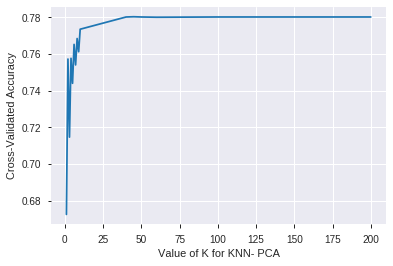

In [147]:
%matplotlib inline

# 40 best k
plt.plot(k_range, pcak_scores)
plt.xlabel('Value of K for KNN- PCA')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
# SVC PCA

In [149]:
pcaparam_grid4 = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(pcaparam_grid4))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pcagrid_search4 = GridSearchCV(SVC(), pcaparam_grid4, cv=2, return_train_score=True)

In [151]:
pcagrid_search4.fit(X_train_reduced, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [152]:
print("Best parameters: {}".format(pcagrid_search4.best_params_))
print("Best cross-validation score: {:.2f}".format(pcagrid_search4.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [153]:
pcagrid_search4.score(X_test_reduced, y_test)

0.7864

In [0]:
descriptionPCA.append("SVC PCA C: 0.001, gamma: 0.001")
final_train_score_PCA.append(pcagrid_search4.best_score_)
final_test_score_PCA.append(pcagrid_search4.score(X_test_reduced, y_test))

In [0]:
pcaresults = pd.DataFrame(pcagrid_search4.cv_results_)

In [156]:
display(pcaresults.head())

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.305241      0.009499  ...          0.780133         0.000075
1       0.303835      0.004979  ...          0.780133         0.000075
2       0.306735      0.004963  ...          0.780133         0.000075
3       0.296280      0.002138  ...          0.780133         0.000075
4       0.312168      0.002942  ...          0.780133         0.000075

[5 rows x 16 columns]

In [0]:
# SVC Linear

In [158]:
from sklearn.svm import SVC


pcaparam_grid5 = {'C': [0.01, 0.1, 1, 10]}

print("Parameter grid:\n{}".format(pcaparam_grid5))

Parameter grid:
{'C': [0.01, 0.1, 1, 10]}


In [0]:
pcagrid_search5 = GridSearchCV(SVC(kernel = 'linear'), pcaparam_grid5, cv=2, return_train_score=True)

In [160]:
pcagrid_search5.fit(X_train_reduced, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [161]:
print("Best parameters: {}".format(pcagrid_search5.best_params_))
print("Best cross-validation score: {:.2f}".format(pcagrid_search5.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.78


In [162]:
pcagrid_search5.score(X_test_reduced, y_test)

0.7864

In [0]:
descriptionPCA.append("SVC Linear C: 0.01 ")
final_train_score_PCA.append(pcagrid_search5.best_score_)
final_test_score_PCA.append(pcagrid_search5.score(X_test_reduced, y_test))

In [0]:
# SVM RBF

In [165]:
pcaparam_grid6 = {'C': [0.001, 0.01, 1, 10, 100],
              'gamma': [0.001, 0.01, 1, 10, 100]}
print("Parameter grid:\n{}".format(pcaparam_grid6))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 100], 'gamma': [0.001, 0.01, 1, 10, 100]}


In [0]:
pcagrid_search6 = GridSearchCV(SVC(kernel = 'rbf'), pcaparam_grid6, cv=2, return_train_score=True)

In [167]:
pcagrid_search6.fit(X_train_reduced, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [168]:
print("Best parameters: {}".format(pcagrid_search6.best_params_))
print("Best cross-validation score: {:.2f}".format(pcagrid_search6.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [169]:
pcagrid_search6.score(X_test_reduced, y_test)

0.7864

In [0]:
descriptionPCA.append("SVC RBF C: 0.001, gamma: 0.001 ")
final_train_score_PCA.append(pcagrid_search6.best_score_)
final_test_score_PCA.append(pcagrid_search6.score(X_test_reduced, y_test))

In [0]:
# SVM Poly

In [172]:

pcaparam_grid7 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(pcaparam_grid7))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [0]:
pcags7 = GridSearchCV(SVC(kernel='poly', degree=2), pcaparam_grid7, cv=2, return_train_score=True)

In [174]:
pcags7.fit(X_train_reduced, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [175]:
print("Best parameters: {}".format(pcags7.best_params_))
print("Best cross-validation score: {:.2f}".format(pcags7.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.78


In [176]:
pcags7.score(X_test_reduced, y_test)

0.786

In [0]:
descriptionPCA.append("SVC Poly C: 0.01 ")
final_train_score_PCA.append(pcags7.best_score_)
final_test_score_PCA.append(pcags7.score(X_test_reduced, y_test))

In [0]:
# Linear SVC 
 from sklearn.svm import LinearSVC

In [179]:
param_grid8 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search8=GridSearchCV(LinearSVC(random_state=0), param_grid8, cv=2,return_train_score=True)
grid_search8.fit(X_train_scale, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [180]:
print("Best parameters: {}".format(grid_search8.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search8.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.78


In [0]:
description.append("Linear SVC C: 0.1 ")
final_train_score.append(grid_search8.best_score_)
final_test_score.append(grid_search8.score(X_test_scale, y_test))

In [0]:
# PCA Linear SVC

In [183]:
pcaparam_grid8 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
pcagrid_search8=GridSearchCV(LinearSVC(random_state=0), pcaparam_grid8, cv=2,return_train_score=True)
pcagrid_search8.fit(X_train_reduced, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [184]:
print("Best parameters: {}".format(pcagrid_search8.best_params_))
print("Best cross-validation score: {:.2f}".format(pcagrid_search8.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.78


In [0]:
descriptionPCA.append("Linear SVC C: 0.1 ")
final_train_score_PCA.append(pcagrid_search8.best_score_)
final_test_score_PCA.append(pcagrid_search8.score(X_test_reduced, y_test))

# **ANN**

In [186]:
X_train_scale.shape

(7500, 28)

In [187]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [188]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#1- create model
model = Sequential()
#input layer
model.add(Dense(64, activation = 'relu', input_dim = 28))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#2- compile: create computational graph
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

#3- fit: training
model.fit(X_train_scale, y_train, epochs = 50, batch_size = 128)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





7500/7500 [==============================] - 5s 695us/step - loss: 0.7064 - acc: 0.5907
Epoch 2/50
7500/7500 [==============================] - 0s 34us/step - loss: 0.6711 - acc: 0.7784
Epoch 3/50
7500/7500 [==============================] - 0s 32us/step - loss: 0.6572 - acc: 0.7799
Epoch 4/50
7500/7500 [==============================] - 0s 32us/step - loss: 0.6445 - acc: 0.7800
Epoch 5/50
7500/7500 [==============================] - 0s 33us/step - loss: 0.6326 - acc: 0.7803
Epoch 6/50
7500/7500 [==============================] - 0s 33us/step - loss: 0.6218 - acc: 0.7803
Epoch 7/50
7500/7500 [==============================] - 0s 35us/step - loss: 0.6117 - acc: 0.7805
Epoch 8/50
7500/7500 [==============================] - 0s 32us/step - loss: 0.6025 - acc: 0.7808
Epoch 9/50
7500/7500 [==============================] - 0s 34us/step - loss: 0.5942 - acc: 0.7807
Epoch 10/5

In [189]:
#4 - evaluation

model.evaluate(X_train_scale, y_train)

7500/7500 [==============================] - 0s 39us/step


[0.46508741416931154, 0.8116000000317891]

In [190]:
model.evaluate(X_test_scale, y_test)

2500/2500 [==============================] - 0s 38us/step


[0.5391802328109742, 0.7704]

In [191]:
model.predict(X_test_scale)

array([[0.17607704],
       [0.17607704],
       [0.18053412],
       ...,
       [0.17607704],
       [0.41683933],
       [0.20731926]], dtype=float32)

In [0]:
y_prednn=model.predict_classes(X_test_scale)

In [193]:
accuracy_score(y_prednn,y_test)

0.7704

In [0]:
# The table of summarization

In [195]:
print(description)
print(final_train_score)
print(final_test_score)

print(descriptionPCA)
print(final_train_score_PCA)
print(final_test_score_PCA)

['logistic regression C : 1', 'Decision Tree max depth 3', 'KNN n= 40, weights = uniform', 'SVC C: 0.001, gamma: 0.001', 'SVC Linear C: 0.01', 'SVC RBF C: 0.01 gamma : 0.001', 'SVC Poly C: 0.001', 'Linear SVC C: 0.1 ']
[0.5008004044173245, 0.7801333831703925, 0.7804, 0.7801333333333333, 0.7801333333333333, 0.7801333333333333, 0.78, 0.7793333333333333]
[0.5001733590895409, 0.7864, 0.7872, 0.7864, 0.7864, 0.7864, 0.786, 0.786]
['Logistic C: 0.1', 'Decision Tree max_depth : 3', 'KNN n : 200, weights : distance', 'SVC PCA C: 0.001, gamma: 0.001', 'SVC Linear C: 0.01 ', 'SVC RBF C: 0.001, gamma: 0.001 ', 'SVC Poly C: 0.01 ', 'Linear SVC C: 0.1 ']
[0.5012288967214219, 0.7786669829927332, 0.7801333333333333, 0.7801333333333333, 0.7801333333333333, 0.7801333333333333, 0.78, 0.7794666666666666]
[0.5004276825890323, 0.7848, 0.786, 0.7864, 0.7864, 0.7864, 0.786, 0.7864]


In [0]:
description=pd.DataFrame(description)
descriptionPCA=pd.DataFrame(descriptionPCA)
final_test_score=pd.DataFrame(final_test_score)
final_train_score=pd.DataFrame(final_train_score)
final_test_score_PCA=pd.DataFrame(final_test_score_PCA)
final_train_score_PCA=pd.DataFrame(final_train_score_PCA)

In [0]:
summary_score=pd.concat([description,final_train_score,final_test_score,descriptionPCA,final_train_score_PCA,final_test_score_PCA], axis=1, ignore_index=True)

In [0]:
summary_score.columns=['Description', 'Train Score','Test Score', 'Description PCA', 'Train Score', 'Test Score']

In [199]:
# Summarized Accuracy
summary_score

Description  Train Score  ...  Train Score Test Score
0      logistic regression C : 1     0.500800  ...     0.501229   0.500428
1      Decision Tree max depth 3     0.780133  ...     0.778667   0.784800
2   KNN n= 40, weights = uniform     0.780400  ...     0.780133   0.786000
3     SVC C: 0.001, gamma: 0.001     0.780133  ...     0.780133   0.786400
4             SVC Linear C: 0.01     0.780133  ...     0.780133   0.786400
5  SVC RBF C: 0.01 gamma : 0.001     0.780133  ...     0.780133   0.786400
6              SVC Poly C: 0.001     0.780000  ...     0.780000   0.786000
7             Linear SVC C: 0.1      0.779333  ...     0.779467   0.786400

[8 rows x 6 columns]

In [0]:
# PCA helps to attain almost same accuracy by reducing variables into principal components

In [0]:
# THE END ####################################